# Loss Curve

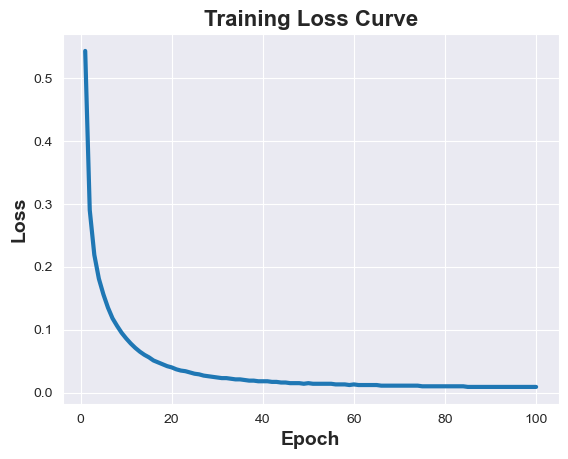

In [35]:
# import modules
import re
import matplotlib.pyplot as plt

# open the file and read the lines
file = open("nohup.out", "r")
lines = file.readlines()
file.close()

# create empty lists to store the epoch and loss values
epochs = []
losses = []

# loop through each line and extract the epoch and loss using regex
for line in lines:
    # match the pattern "EPOCH[number/number] loss[number]-|Sample:number|"
    match = re.search(r"EPOCH\[(\d+)/\d+\] loss(\d+\.\d+)-\|Sample:\d+\.\d+\|", line)
    # if there is a match, append the epoch and loss to the lists
    if match:
        epoch = int(match.group(1)) # get the first group as an integer
        loss = float(match.group(2)) # get the second group as a float
        epochs.append(epoch)
        losses.append(loss)

# plot the epoch and loss lists using matplotlib
plt.plot(epochs, losses,linewidth=3)
plt.xlabel("Epoch",fontweight='bold', fontsize=14)
plt.ylabel("Loss",fontweight='bold', fontsize=14)
plt.title("Training Loss Curve", fontweight='heavy', fontsize=16)
plt.savefig("loss.png",transparent=True)
plt.show()

# Recall Curve

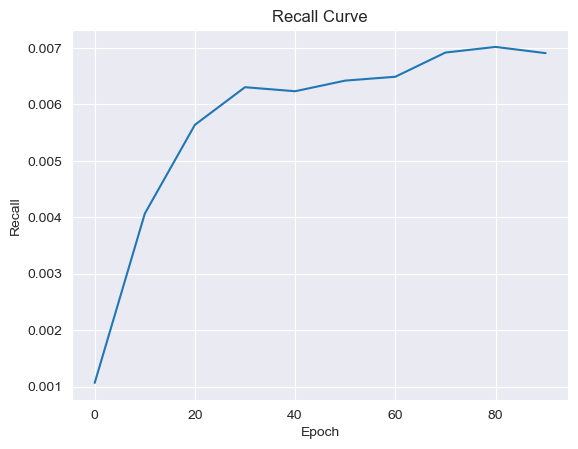

In [24]:
# import modules
import re
import matplotlib.pyplot as plt

# open the file and read the lines
file = open("nohup.out", "r")
lines = file.readlines()
file.close()

# create empty lists to store the epoch and recall values
epochs = []
recalls = []

# initialize a counter variable for the epoch number
epoch = 0

# loop through each line and extract the recall value using regex
for line in lines:
    # match the pattern "{'precision': array([number]), 'recall': array([number]), 'ndcg': array([number])}"
    match = re.search(r"\{'precision': array\(\[(\d+\.\d+)\]\), 'recall': array\(\[(\d+\.\d+)\]\)", line)
    # if there is a match, append the epoch and recall to the lists
    if match:
        recall = float(match.group(2)) # get the second group as a float
        epochs.append(epoch)
        recalls.append(recall)
        # increment the epoch number by 10
        epoch += 10

# plot the epoch and recall lists using matplotlib
plt.plot(epochs, recalls)
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("Recall Curve")
plt.show()

# ndcg Curve

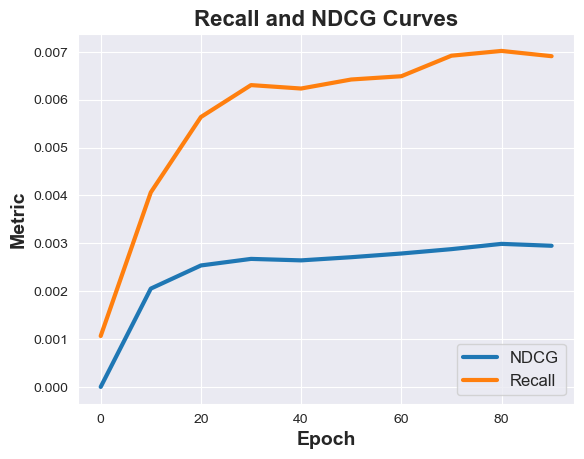

In [37]:
# import modules
import re
import matplotlib.pyplot as plt

# open the file and read the lines
file = open("nohup.out", "r")
lines = file.readlines()
file.close()

# create empty lists to store the epoch and recall values
epochs = []
ndcgs = []

# initialize a counter variable for the epoch number
epoch = 0

# loop through each line and extract the recall value using regex
for line in lines:
    # match the pattern "{'precision': array([number]), 'recall': array([number]), 'ndcg': array([number])}"
    match = re.search(r"\{'precision': array\(\[(\d+\.\d+)\]\), 'recall': array\(\[(\d+\.\d+)\]\), 'ndcg': array\(\[(\d+\.\d+)\]\)\}", line)
    # if there is a match, append the epoch and recall to the lists
    if match:
        ndcg = float(match.group(3)) # get the second group as a float
        epochs.append(epoch)
        ndcgs.append(ndcg)
        # increment the epoch number by 10
        epoch += 10

plt.plot(epochs, ndcgs, label="NDCG", linewidth=3)
plt.plot(epochs, recalls, label="Recall", linewidth=3)
plt.xlabel("Epoch", fontweight='bold', fontsize=14)
plt.ylabel("Metric", fontweight='bold', fontsize=14)
plt.title("Recall and NDCG Curves", fontweight='heavy', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("ndcg-recalll.png",transparent=True)
plt.show()